In [1]:
# pandas
import pandas as pd
from pandas import Series,DataFrame

# numpy, matplotlib, seaborn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

pd.set_option('max_colwidth', 200)
pd.options.display.max_rows = 200

In [2]:
from const import *

In [3]:
import train_reorder_size_model
import utils, predict

/home/damonhao/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [30]:
reload(train_reorder_size_model)
reload(utils)

<module 'utils' from 'utils.pyc'>

In [31]:
grid_cv = train_reorder_size_model.run(REORDER_INPUT_DIR+'train_all_reorder.csv', REORDER_INPUT_DIR+'validate_all_reorder.csv')

preprocess, drop columns num: 4, names:set(['order_id', 'reorder_sizes_min', 'last_n_sizes_max', 'user_id'])
preprocess, drop columns num: 4, names:set(['order_id', 'reorder_sizes_min', 'last_n_sizes_max', 'user_id'])
train columns ['order_number', 'order_dow', 'order_hour_of_day', 'days_since_prior_order', 'last_size', 'last_n_sizes_mean', 'last_n_sizes_min', 'last_n_sizes_std', 'reorder_sizes_mean', 'reorder_sizes_std', 'reorder_sizes_max', 'reorder_sizes_most', 'reorder_sizes_most_count']
Best Params: {'n_estimators': 50, 'subsample': 0.8, 'learning_rate': 0.1, 'colsample_bytree': 0.8, 'max_depth': 6}
Best CV Score: -14.5969334517
validate score: -14.6348636005
********************
run cost time: 0.33 minute
******************************


In [32]:
pd.DataFrame(grid_cv.cv_results_)

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_colsample_bytree,param_learning_rate,param_max_depth,param_n_estimators,param_subsample,params,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.509585,0.007420,-14.646932,-14.184890,0.8,0.1,4,50,0.8,"{u'n_estimators': 50, u'subsample': 0.8, u'lea...",...,-14.919427,-14.112743,-14.720901,-14.158925,-14.719222,-14.174634,0.007998,0.000200,0.235876,0.057797
1,0.919577,0.011113,-14.622784,-13.748203,0.8,0.1,4,100,0.8,"{u'n_estimators': 100, u'subsample': 0.8, u'le...",...,-14.950466,-13.668196,-14.644353,-13.739786,-14.701121,-13.743813,0.003246,0.000259,0.235680,0.055112
2,0.721355,0.010447,-14.596933,-13.298643,0.8,0.1,6,50,0.8,"{u'n_estimators': 50, u'subsample': 0.8, u'lea...",...,-14.893904,-13.246751,-14.653256,-13.298085,-14.595866,-13.264717,0.012527,0.000629,0.242930,0.050339
3,1.342938,0.014348,-14.646281,-12.506122,0.8,0.1,6,100,0.8,"{u'n_estimators': 100, u'subsample': 0.8, u'le...",...,-14.974440,-12.502830,-14.651926,-12.515332,-14.631677,-12.485172,0.026235,0.000458,0.225946,0.037433


In [15]:
pd.DataFrame(grid_cv.cv_results_)

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_colsample_bytree,param_learning_rate,param_max_depth,param_n_estimators,param_subsample,params,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.646514,0.012531,-15.450723,-12.815189,0.8,0.1,8,50,0.8,"{u'n_estimators': 50, u'subsample': 0.8, u'lea...",...,-15.844232,-12.709081,-15.347959,-12.788013,-15.488468,-12.821807,0.010079,0.000113,0.278624,0.066668
1,1.146970,0.020463,-15.615608,-11.636606,0.8,0.1,8,100,0.8,"{u'n_estimators': 100, u'subsample': 0.8, u'le...",...,-16.010657,-11.524878,-15.532451,-11.652889,-15.616013,-11.672945,0.008555,0.000200,0.288115,0.064349
2,1.696402,0.030263,-15.781009,-10.664229,0.8,0.1,8,150,0.8,"{u'n_estimators': 150, u'subsample': 0.8, u'le...",...,-16.196889,-10.534547,-15.672399,-10.656114,-15.806224,-10.697187,0.024544,0.001000,0.303502,0.069423
3,2.251571,0.040647,-15.927075,-9.806619,0.8,0.1,8,200,0.8,"{u'n_estimators': 200, u'subsample': 0.8, u'le...",...,-16.346843,-9.711627,-15.851101,-9.784217,-15.908897,-9.841509,0.044853,0.000849,0.298537,0.053484


In [22]:
pd.DataFrame(grid_cv.cv_results_)

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_colsample_bytree,param_learning_rate,param_max_depth,param_n_estimators,param_subsample,params,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.374745,0.006724,-15.364728,-15.015137,0.8,0.1,4,50,0.8,"{u'n_estimators': 50, u'subsample': 0.8, u'lea...",...,-15.662305,-14.914871,-15.395754,-15.019816,-15.492312,-15.026279,0.007540,0.000413,0.253986,0.062507
1,0.655971,0.010499,-15.311993,-14.641448,0.8,0.1,4,100,0.8,"{u'n_estimators': 100, u'subsample': 0.8, u'le...",...,-15.618455,-14.539001,-15.304283,-14.673716,-15.433072,-14.655415,0.027789,0.000069,0.246668,0.063615
2,0.491882,0.009516,-15.331280,-14.222542,0.8,0.1,6,50,0.8,"{u'n_estimators': 50, u'subsample': 0.8, u'lea...",...,-15.691739,-14.170694,-15.248833,-14.211890,-15.427216,-14.211064,0.005905,0.001147,0.257279,0.050482
3,0.901174,0.015574,-15.391726,-13.574382,0.8,0.1,6,100,0.8,"{u'n_estimators': 100, u'subsample': 0.8, u'le...",...,-15.770577,-13.542579,-15.323649,-13.584375,-15.420995,-13.588289,0.038967,0.002211,0.252396,0.048867


In [33]:
xgb_model = grid_cv.best_estimator_

In [34]:
utils.get_feature_score(xgb_model._Booster.get_score(importance_type='gain'))

,features,scores
0,reorder_sizes_mean,19256.584860
1,last_n_sizes_mean,9590.557395
2,reorder_sizes_std,941.265574
3,last_size,554.790047
4,days_since_prior_order,501.201253
5,reorder_sizes_max,370.547620
6,last_n_sizes_min,302.381479
7,reorder_sizes_most_count,300.172845
8,last_n_sizes_std,297.620965
9,reorder_sizes_most,287.980621


In [24]:
utils.get_feature_score(xgb_model._Booster.get_score(importance_type='gain'))

,features,scores
0,last_n_sizes_mean,24094.265044
1,last_n_sizes_min,6949.472304
2,last_size,3160.074517
3,last_n_sizes_std,1546.814743
4,days_since_prior_order,972.178357
5,order_number,633.167451
6,order_dow,359.140894
7,order_hour_of_day,335.461224


In [12]:
utils.get_feature_score(xgb_model._Booster.get_score(importance_type='gain'))

,features,scores
0,last_n_sizes_mean,1574.823813
1,last_n_sizes_min,270.338656
2,last_size,192.734634
3,last_n_sizes_std,133.867404
4,days_since_prior_order,105.001018
5,order_number,81.348467
6,order_hour_of_day,67.405634
7,order_dow,62.808215


In [17]:
utils.get_feature_score(xgb_model._Booster.get_score(importance_type='gain'))

,features,scores
0,last_n_sizes_mean,5941.013822
1,last_n_sizes_min,992.688860
2,last_size,584.172280
3,last_n_sizes_std,314.474533
4,days_since_prior_order,216.887312
5,order_number,156.938326
6,order_hour_of_day,103.461076
7,order_dow,101.477905


In [25]:
corr_all_reorder = pd.read_csv('../reorder_size_input/corr_all_reorder.csv', index_col=0)

In [26]:
corr_all_reorder.reorder_size

order_id                    0.002400
user_id                    -0.003685
order_number                0.225860
order_dow                  -0.039846
order_hour_of_day          -0.018074
days_since_prior_order     -0.133156
reorder_size                1.000000
last_size                   0.667701
last_n_sizes_mean           0.736071
last_n_sizes_max            0.720676
last_n_sizes_min            0.642983
last_n_sizes_std            0.495925
reorder_sizes_mean          0.738608
reorder_sizes_std           0.693451
reorder_sizes_max           0.696157
reorder_sizes_min                NaN
reorder_sizes_most          0.531140
reorder_sizes_most_count   -0.048974
Name: reorder_size, dtype: float64

In [3]:
corr = pd.read_csv('../reorder_size_input/corr_train.csv', index_col=0)

In [4]:
corr['reorder_size']

order_id                  0.002400
user_id                  -0.003685
order_number              0.225860
order_dow                -0.039846
order_hour_of_day        -0.018074
days_since_prior_order   -0.133156
reorder_size              1.000000
last_size                 0.667701
last_n_sizes_mean         0.736071
last_n_sizes_max          0.720676
last_n_sizes_min          0.642983
last_n_sizes_std          0.495925
Name: reorder_size, dtype: float64

In [7]:
corr['last_n_sizes_max']

order_id                  0.003281
user_id                  -0.003528
order_number              0.310865
order_dow                -0.023813
order_hour_of_day        -0.005305
days_since_prior_order   -0.172359
reorder_size              0.720676
last_size                 0.855894
last_n_sizes_mean         0.957540
last_n_sizes_max          1.000000
last_n_sizes_min          0.776967
last_n_sizes_std          0.799298
Name: last_n_sizes_max, dtype: float64

In [8]:
corr['last_n_sizes_min']

order_id                  0.005499
user_id                  -0.006473
order_number              0.289956
order_dow                -0.020772
order_hour_of_day        -0.006475
days_since_prior_order   -0.155364
reorder_size              0.642983
last_size                 0.776185
last_n_sizes_mean         0.909286
last_n_sizes_max          0.776967
last_n_sizes_min          1.000000
last_n_sizes_std          0.245257
Name: last_n_sizes_min, dtype: float64

In [31]:
corr['last_n_sizes_max']

order_id                  0.004750
user_id                  -0.011094
order_number              0.310660
order_dow                -0.023184
order_hour_of_day        -0.001685
days_since_prior_order   -0.170907
reorder_size              0.719929
last_size                 0.853066
last_n_sizes_mean         0.958903
last_n_sizes_max          1.000000
last_n_sizes_min          0.781623
last_n_sizes_std          0.803363
Name: last_n_sizes_max, dtype: float64

In [ ]:
corr.head()

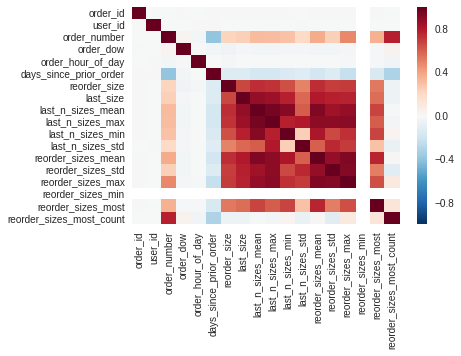

In [27]:
sns.heatmap(corr_all_reorder)

In [5]:
df_predict = pd.read_csv('../prediction/predict_validate_reorder_size.csv')

In [51]:
df_more = df_predict[df_predict.pred_reorder_size > df_predict.reorder_size]
df_less = df_predict[df_predict.pred_reorder_size < df_predict.reorder_size]

In [74]:
(df_predict.pred_reorder_size - df_predict.reorder_size).sum()

-7149.0

In [53]:
df_predict.reorder_size.sum()

165917

In [71]:
df_more.shape

(11870, 4)

In [72]:
df_more.shape[0]/ float(df_predict.shape[0])

0.44979158772262223

In [73]:
df_less.shape[0]/ float(df_predict.shape[0])

0.39791587722622207

In [75]:
df_predict[(df_predict.reorder_size == 0) & (df_predict.pred_reorder_size==0)]

,user_id,reorder_size,pred_reorder_size_float,pred_reorder_size


In [9]:
df_validate = pd.read_csv('../reorder_size_input/validate_all_reorder.csv')

In [11]:
zero = df_predict[df_predict.reorder_size == 0]
df_validate[df_validate.user_id.isin(zero[UID])]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,reorder_size,last_size,last_n_sizes_mean,last_n_sizes_max,last_n_sizes_min,last_n_sizes_std,reorder_sizes_mean,reorder_sizes_std,reorder_sizes_max,reorder_sizes_min,reorder_sizes_most,reorder_sizes_most_count
21,3358269,165037,6,6,10,7.0,0,3.0,4.000000,5.0,3.0,1.000000,2.600000,2.073644,5.0,0.0,0.0,1.0
29,1742785,165048,19,1,15,11.0,0,2.0,1.666667,2.0,1.0,0.577350,1.111111,0.963382,3.0,0.0,1.0,8.0
40,1038805,165061,4,1,16,2.0,0,2.0,1.333333,2.0,0.0,1.154701,1.333333,1.154701,2.0,0.0,2.0,2.0
73,2003478,165113,7,2,11,30.0,0,3.0,1.666667,3.0,1.0,1.154701,0.833333,1.169045,3.0,0.0,0.0,3.0
75,974612,165115,6,0,16,30.0,0,0.0,0.666667,2.0,0.0,1.154701,0.400000,0.894427,2.0,0.0,0.0,4.0
81,344619,165125,4,5,18,30.0,0,3.0,1.000000,3.0,0.0,1.732051,1.000000,1.732051,3.0,0.0,0.0,2.0
86,1597960,165133,4,5,1,4.0,0,0.0,0.333333,1.0,0.0,0.577350,0.333333,0.577350,1.0,0.0,0.0,2.0
99,1341122,165159,7,3,13,30.0,0,0.0,0.666667,1.0,0.0,0.577350,0.333333,0.516398,1.0,0.0,0.0,4.0
131,1577964,165205,5,2,17,30.0,0,9.0,4.333333,9.0,1.0,4.163332,3.250000,4.031129,9.0,0.0,0.0,1.0
132,1229872,165207,4,2,11,2.0,0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,3.0


In [7]:
df_analysis = predict.read_max_f1_analysis('../prediction/analysis_08-04-20-56-54_validate_diff_stack.csv')

In [8]:
df_analysis_real = predict.read_max_f1_analysis('../prediction/analysis_08-04-20-54-13_validate_diff_stack.csv')

In [48]:
df_analysis.shape

(26390, 5)

In [15]:
df_predict_proba = pd.read_csv('../prediction/validate_diff_stack.csv')

In [22]:
target_index = df_analysis.apply(lambda row: True if (row['true_products'][0] is None) else False, axis=1)
df_none = df_analysis[target_index]

In [23]:
df_low_none = df_none[df_none.scores < 0.4]

In [34]:
df_not_none = df_analysis[~target_index]

In [43]:
df_low_not_none = df_not_none[df_not_none.scores < 0.1]

In [44]:
df_low_not_none.shape

(4346, 5)

In [68]:
df_low_not_none.iloc[4000: 4200]

,user_id,true_products,products,best_k_proba,scores
25690,185259,"[31766, 37646, 39561, 48524]","[None, 13176, 311]",[ 0.32251 0.47792 0.38226],0.0
25691,173743,"[2014, 11826, 40332]","[None, 4942]",[ 0.52267 0.47733],0.0
25693,168957,"[32573, 34362, 5819]","[38185, 42731, 39041]",[ 0.47718 0.43959 0.34013],0.0
25694,172858,[31342],"[None, 27521, 30442]",[ 0.2894 0.47688 0.44677],0.0
25695,204044,[43830],"[None, 47626, 34358]",[ 0.30111 0.47674 0.42454],0.0
25697,186485,[19677],"[None, 29345]",[ 0.52346 0.47654],0.0
25699,201293,[47734],"[None, 24852]",[ 0.52381 0.47619],0.0
25701,185306,"[16254, 40164, 47766]","[None, 38959, 34668]",[ 0.29901 0.47586 0.42952],0.0
25702,186531,"[22124, 1559, 9076, 43641, 30183, 44142]","[None, 40332]",[ 0.52415 0.47585],0.0
25703,168069,[2314],"[None, 47766, 21903]",[ 0.36413 0.47571 0.30549],0.0


In [75]:
predict.get_true_product_pred_proba(203963, [], df_predict_proba)

,user_id,product_id,proba
354250,203963,47591,0.401620
384061,203963,31717,0.372251
407740,203963,46667,0.351398
441241,203963,49683,0.324665
444714,203963,12614,0.322055
478850,203963,47144,0.297777
493336,203963,40706,0.288285
560611,203963,9387,0.250233
597170,203963,34448,0.232769
602619,203963,22159,0.230331


In [76]:
df_analysis_fix = pd.read_csv('../prediction/analysis_08-04-23-52-06_validate_diff_stack.csv')

In [77]:
df_analysis_fix.head()

,user_id,true_products,products,best_k_proba,scores
0,196610,"[196, 21292]","[196, 21292, 12341]",[ 0.92904 0.68417 0.60829],0.800000
1,166081,"[13080, 13176, 46554, 47209, 7217, 15700, 26376, 11844, 5456, 18070, 35951, 41950, 21783, 33731, 36554, 18656, 21903, 21425, 18963, 27156, 45007, 42557, 44359, 34243, 11140, 47019, 40078, 5194, 42...","[13176, 47209, 18070, 46554, 26376, 13080, 15700, 27104, 11844, 7217, 5484, 5456, 36554, 32177, 1692, 13263, 41950, 8309, 5194, 28465, 11448, 18656, 35951, 26096, 27156, 29965, 21137, 11140, 11520...",[ 0.92885 0.92651 0.92502 0.92478 0.92471 0.9246 0.92307 0.91741\n 0.91714 0.91336 0.9097 0.90891 0.9071 0.90466 0.89987 0.89684\n 0.89647 0.89624 0.89233 0.89108 0.88877 0...,0.574468
2,179451,"[46149, 196]","[196, 46149]",[ 0.92831 0.87206],1.000000
3,174620,"[13176, 19348, 10768, 19660, 19057, 39275, 25610, 23540, 21137, 36070]","[19660, 13176, 19348, 10768, 23540, 36070, 39275, 25610, 21137, 43961, 28494, 2086, 19057, 42265]",[ 0.92827 0.92742 0.92696 0.92514 0.9124 0.88898 0.87833 0.87791\n 0.87464 0.80678 0.79552 0.79394 0.76493 0.64746],0.833333
4,178074,[19318],[19318],[ 0.92803],1.000000


In [80]:
fix_greate_index = df_analysis_fix.scores > df_analysis.scores

In [84]:
df_comp = df_analysis.merge(df_analysis_fix, how='left', on=[UID], suffixes=['_var', '_fix'])

In [87]:
df_fix_greate = df_comp[fix_greate_index]

In [89]:
df_fix_greate.iloc[500: 550]

,user_id,true_products_var,products_var,best_k_proba_var,scores_var,true_products_fix,products_fix,best_k_proba_fix,scores_fix
1283,194027,"[38827, 27744, 25122, 42701, 12935, 3420, 32935, 32151, 34126, 11422, 44359]","[12935, 27744, 38827, 16396, 3420, 32935, 38647, 42701, 23348, 651]",[ 0.91811 0.91407 0.89949 0.89909 0.89893 0.89407 0.89116 0.88686\n 0.87244 0.85559],0.571429,"[38827, 27744, 25122, 42701, 12935, 3420, 32935, 32151, 34126, 11422, 44359]","[12935, 27744, 38827, 16396, 3420, 32935, 38647, 42701, 23348, 651, 11422, 32151, 31720, 25122, 34126, 37029, 28476, 42445]",[ 0.91811 0.91407 0.89949 0.89909 0.89893 0.89407 0.89116 0.88686\n 0.87244 0.85559 0.83705 0.82649 0.73285 0.70892 0.56282 0.53759\n 0.53242 0.52957],0.689655
1286,186181,"[5646, 16168, 5785, 6187, 27730, 40824, 19711, 32689, 18441, 40709, 40203, 2825, 16262, 12872]","[32254, 21137, 12888, 27730, 40709, 6187, 5785, 40824, 4149, 25146]",[ 0.9181 0.90471 0.90346 0.89436 0.87631 0.85647 0.84895 0.8412\n 0.80123 0.78961],0.416667,"[5646, 16168, 5785, 6187, 27730, 40824, 19711, 32689, 18441, 40709, 40203, 2825, 16262, 12872]","[32254, 21137, 12888, 27730, 40709, 6187, 5785, 40824, 4149, 25146, 32689, 12872, 16168, 41290, 16262, 40203, 37029, 1090, 37646, 41665, 5646, 19711, 25623]",[ 0.9181 0.90471 0.90346 0.89436 0.87631 0.85647 0.84895 0.8412\n 0.80123 0.78961 0.74248 0.73065 0.70885 0.7072 0.66054 0.65629\n 0.61075 0.61072 0.57328 0.56011 0.53271 0....,0.648649
1289,181075,"[13176, 9595, 38108, 28985, 37966, 46045, 9339, 7806, 19895, 44560, 9839, 30795, 42265, 22548, 34262, 16254, 16797, 34824, 33303]","[9595, 25832, 13176, 15693, 43643, 37966, 21903, 7806, 27845, 3896, 47196, 38734, 29594, 19895, 46045, 42265]",[ 0.91809 0.89531 0.89123 0.883 0.88293 0.87399 0.86624 0.8572\n 0.84444 0.84059 0.79796 0.78886 0.78125 0.77704 0.76083 0.75656],0.400000,"[13176, 9595, 38108, 28985, 37966, 46045, 9339, 7806, 19895, 44560, 9839, 30795, 42265, 22548, 34262, 16254, 16797, 34824, 33303]","[9595, 25832, 13176, 15693, 43643, 37966, 21903, 7806, 27845, 3896, 47196, 38734, 29594, 19895, 46045, 42265, 9839, 30795, 21469, 17027, 895, 17630, 33120, 9339, 28985, 44560, 34262, 35461, 35921,...",[ 0.91809 0.89531 0.89123 0.883 0.88293 0.87399 0.86624 0.8572\n 0.84444 0.84059 0.79796 0.78886 0.78125 0.77704 0.76083 0.75656\n 0.73379 0.71691 0.71521 0.70549 0.69684 0....,0.466667
1290,172361,"[43352, 38164, 23288, 49325, 26604, 16965, 8277, 4605, 21463, 16185, 32734, 37158]","[47912, 8490, 38164, 26604, 8277, 43352, 26131, 15290, 10749]",[ 0.91809 0.90894 0.89568 0.88281 0.87324 0.82863 0.80105 0.786\n 0.78558],0.380952,"[43352, 38164, 23288, 49325, 26604, 16965, 8277, 4605, 21463, 16185, 32734, 37158]","[47912, 8490, 38164, 26604, 8277, 43352, 26131, 15290, 10749, 21463, 40706, 16965, 27086, 44229, 19678, 2295, 20345, 23288, 21903, 49325, 13535, 16185, 4605]",[ 0.91809 0.90894 0.89568 0.88281 0.87324 0.82863 0.80105 0.786\n 0.78558 0.78123 0.77205 0.73748 0.7369 0.72793 0.66068 0.65846\n 0.65732 0.62983 0.62254 0.56069 0.52766 0.5...,0.571429
1291,187210,"[46270, 6341, 22720, 41540, 11367, 8859, 29307, 25197, 30949, 10085, 28156, 3843, 22849, 41578, 18566, 9463, 36603, 15872, 1328, 40723]","[21137, 24852, 27090, 8859, 28248, 10085, 18566, 9839, 25197, 11367, 22124, 40571, 39275, 35321, 48004, 6341, 5603, 47601, 48226]",[ 0.91808 0.89795 0.88577 0.86361 0.86042 0.85781 0.85423 0.84902\n 0.84751 0.83761 0.83472 0.82058 0.81045 0.79896 0.79515 0.79252\n 0.75792 0.7141 0.71006],0.307692,"[46270, 6341, 22720, 41540, 11367, 8859, 29307, 25197, 30949, 10085, 28156, 3843, 22849, 41578, 18566, 9463, 36603, 15872, 1328, 40723]","[21137, 24852, 27090, 8859, 28248, 10085, 18566, 9839, 25197, 11367, 22124, 40571, 39275, 35321, 48004, 6341, 5603, 47601, 48226, 45200, 4455, 34921, 30975, 30949, 46992, 1378, 40723, 28156, 45007...",[ 0.91808 0.89795 0.88577 0.86361 0.86042 0.85781 0.85423 0.84902\n 0.84751 0.83761 0.83472 0.82058 0.81045 0.79896 0.79515 0.79252\n 0.75792 0.7141 0.71006 0.

In [10]:
df_comp2 = df_analysis.merge(df_analysis_real, how='left', on=[UID], suffixes=['_var', '_real'])

In [11]:
df_real_greate = df_comp2[df_comp2.scores_real > df_comp2.scores_var]

In [17]:
df_real_greate.shape

(12207, 9)

In [95]:
df_real_greate.iloc[0: 100]

,user_id,true_products_var,products_var,best_k_proba_var,scores_var,true_products_real,products_real,best_k_proba_real,scores_real
6,178842,"[40174, 13176, 13027, 21603, 13249, 39877, 39928, 35132, 2238, 38275, 46969, 28199]","[13176, 27845, 40174, 38275, 35132, 39928, 29941, 39877, 46969]",[ 0.92763 0.92399 0.91216 0.90638 0.8477 0.83713 0.81593 0.79073\n 0.75574],0.666667,"[40174, 13176, 13027, 21603, 13249, 39877, 39928, 35132, 2238, 38275, 46969, 28199]","[13176, 27845, 40174, 38275, 35132, 39928, 29941, 39877, 46969, 21603, 28199, 32177]",[ 0.92763 0.92399 0.91216 0.90638 0.8477 0.83713 0.81593 0.79073\n 0.75574 0.72295 0.65347 0.59583],0.750000
10,203305,"[43154, 19660, 1938]","[43154, 28204, 19660, 45007, 38383]",[ 0.9274 0.91534 0.8919 0.8046 0.75067],0.500000,"[43154, 19660, 1938]","[43154, 28204, 19660]",[ 0.9274 0.91534 0.8919 ],0.666667
15,198613,"[2966, 27966, 43086, 13176, 41950, 48825, 44359, 43961, 36389, 47672, 14947, 9955, 34134, 3020, 42345, 44201, 4793, 1463, 49318, 28058, 20738, 14211, 47888, 5031, 26790, 25936, 21137, 37417, 48102...","[4793, 1463, 43086, 28058, 41950, 27966, 9955, 36389, 44359, 13176, 14947, 2966, 34134, 21137, 48825, 43961, 3020, 42345, 47888, 14211, 44201, 22115, 45571, 49318, 4920, 36550, 45620]",[ 0.92722 0.92448 0.9239 0.92334 0.92277 0.92267 0.9226 0.92259\n 0.92242 0.92101 0.92086 0.92066 0.92023 0.9198 0.91973 0.91856\n 0.91853 0.91722 0.91661 0.91611 0.91234 0...,0.758621,"[2966, 27966, 43086, 13176, 41950, 48825, 44359, 43961, 36389, 47672, 14947, 9955, 34134, 3020, 42345, 44201, 4793, 1463, 49318, 28058, 20738, 14211, 47888, 5031, 26790, 25936, 21137, 37417, 48102...","[4793, 1463, 43086, 28058, 41950, 27966, 9955, 36389, 44359, 13176, 14947, 2966, 34134, 21137, 48825, 43961, 3020, 42345, 47888, 14211, 44201, 22115, 45571, 49318, 4920, 36550, 45620, 20113, 14467...",[ 0.92722 0.92448 0.9239 0.92334 0.92277 0.92267 0.9226 0.92259\n 0.92242 0.92101 0.92086 0.92066 0.92023 0.9198 0.91973 0.91856\n 0.91853 0.91722 0.91661 0.91611 0.91234 0...,0.806452
19,179233,"[13176, 24799, 20015, 19006, 7781, 36076, 28465, 27966, 47717, 13819, 7753, 8309]","[13176, 19006, 11619, 27966, 20015, 36076, 9203, 24799, 18352, 7781, 47717]",[ 0.92703 0.91789 0.9178 0.91198 0.90631 0.90531 0.90389 0.89165\n 0.88437 0.8743 0.87203],0.695652,"[13176, 24799, 20015, 19006, 7781, 36076, 28465, 27966, 47717, 13819, 7753, 8309]","[13176, 19006, 11619, 27966, 20015, 36076, 9203, 24799, 18352, 7781, 47717, 7753]",[ 0.92703 0.91789 0.9178 0.91198 0.90631 0.90531 0.90389 0.89165\n 0.88437 0.8743 0.87203 0.8684 ],0.750000
23,194570,[32403],"[32403, 8048]",[ 0.92684 0.51853],0.666667,[32403],[32403],[ 0.92684],1.000000
24,199091,"[196, 5258, 46149]",[196],[ 0.92683],0.500000,"[196, 5258, 46149]","[196, 46149]",[ 0.92683 0.79547],0.800000
25,204801,"[14947, 35221, 20119, 44632, 12916, 21108, 39921, 21709]","[14947, 20119, 35221, 44632, 12916, 39921, 21709]",[ 0.92682 0.92419 0.91867 0.91595 0.89537 0.87392 0.85538],0.933333,"[14947, 35221, 20119, 44632, 12916, 21108, 39921, 21709]","[14947, 20119, 35221, 44632, 12916, 39921, 21709, 21108]",[ 0.92682 0.92419 0.91867 0.91595 0.89537 0.87392 0.85538 0.84654],1.000000
26,197376,"[10070, 13176, 40852, 4097, 36606, 32486, 12341, 40706, 28199, 21616, 19057, 21543, 17872, 32016, 8671, 15290, 7350, 36322, 23644]","[13176, 10070, 40852, 4097, 12341, 1203, 21137, 40706, 30949, 32486, 36606, 25197, 43961, 19057, 47209, 15290, 21616]",[ 0.92681 0.92566 0.91874 0.91532 0.91373 0.90427 0.879 0.87824\n 0.87742 0.8651 0.8516 0.85122 0.83463 0.83017 0.82905 0.82266\n 0.8223 ],0.611111,"[10070, 13176, 40852, 4097, 36606, 32486, 12341, 40706, 28199, 21616, 19057, 21543, 17872, 32016, 8671, 15290, 7350, 36322, 23644]","[13176, 10070, 40852, 4097, 12341, 1203, 21137, 40706, 30949, 32486, 36606, 25197, 43961, 19057, 47209, 15290, 21616, 28199, 16083]",[ 0.92681 0.92566 0.91874 0.91532 0.91373 0.90427 0.879 0.87824\n 0.87742 0.8651 0.8516 0.85122 0.83463 0.83017 0.82905 0.82266\n 0.8223 0.

In [13]:
df_1 = df_predict[df_predict.user_id.isin(df_real_greate.user_id)]

In [22]:
df_1[df_1.reorder_size > df_1.pred_reorder_size].shape

(6059, 4)

In [18]:
real_broad_index = df_real_greate.apply(lambda row: len(row['products_real']) > len(row['products_var']) , axis=1)

In [20]:
df_real_greate[real_broad_index].head()

,user_id,true_products_var,products_var,best_k_proba_var,scores_var,true_products_real,products_real,best_k_proba_real,scores_real
6,178842,"[40174, 13176, 13027, 21603, 13249, 39877, 39928, 35132, 2238, 38275, 46969, 28199]","[13176, 27845, 40174, 38275, 35132, 39928, 29941, 39877, 46969]",[ 0.92763 0.92399 0.91216 0.90638 0.8477 0.83713 0.81593 0.79073\n 0.75574],0.666667,"[40174, 13176, 13027, 21603, 13249, 39877, 39928, 35132, 2238, 38275, 46969, 28199]","[13176, 27845, 40174, 38275, 35132, 39928, 29941, 39877, 46969, 21603, 28199, 32177]",[ 0.92763 0.92399 0.91216 0.90638 0.8477 0.83713 0.81593 0.79073\n 0.75574 0.72295 0.65347 0.59583],0.750000
15,198613,"[2966, 27966, 43086, 13176, 41950, 48825, 44359, 43961, 36389, 47672, 14947, 9955, 34134, 3020, 42345, 44201, 4793, 1463, 49318, 28058, 20738, 14211, 47888, 5031, 26790, 25936, 21137, 37417, 48102...","[4793, 1463, 43086, 28058, 41950, 27966, 9955, 36389, 44359, 13176, 14947, 2966, 34134, 21137, 48825, 43961, 3020, 42345, 47888, 14211, 44201, 22115, 45571, 49318, 4920, 36550, 45620]",[ 0.92722 0.92448 0.9239 0.92334 0.92277 0.92267 0.9226 0.92259\n 0.92242 0.92101 0.92086 0.92066 0.92023 0.9198 0.91973 0.91856\n 0.91853 0.91722 0.91661 0.91611 0.91234 0...,0.758621,"[2966, 27966, 43086, 13176, 41950, 48825, 44359, 43961, 36389, 47672, 14947, 9955, 34134, 3020, 42345, 44201, 4793, 1463, 49318, 28058, 20738, 14211, 47888, 5031, 26790, 25936, 21137, 37417, 48102...","[4793, 1463, 43086, 28058, 41950, 27966, 9955, 36389, 44359, 13176, 14947, 2966, 34134, 21137, 48825, 43961, 3020, 42345, 47888, 14211, 44201, 22115, 45571, 49318, 4920, 36550, 45620, 20113, 14467...",[ 0.92722 0.92448 0.9239 0.92334 0.92277 0.92267 0.9226 0.92259\n 0.92242 0.92101 0.92086 0.92066 0.92023 0.9198 0.91973 0.91856\n 0.91853 0.91722 0.91661 0.91611 0.91234 0...,0.806452
19,179233,"[13176, 24799, 20015, 19006, 7781, 36076, 28465, 27966, 47717, 13819, 7753, 8309]","[13176, 19006, 11619, 27966, 20015, 36076, 9203, 24799, 18352, 7781, 47717]",[ 0.92703 0.91789 0.9178 0.91198 0.90631 0.90531 0.90389 0.89165\n 0.88437 0.8743 0.87203],0.695652,"[13176, 24799, 20015, 19006, 7781, 36076, 28465, 27966, 47717, 13819, 7753, 8309]","[13176, 19006, 11619, 27966, 20015, 36076, 9203, 24799, 18352, 7781, 47717, 7753]",[ 0.92703 0.91789 0.9178 0.91198 0.90631 0.90531 0.90389 0.89165\n 0.88437 0.8743 0.87203 0.8684 ],0.750000
24,199091,"[196, 5258, 46149]",[196],[ 0.92683],0.500000,"[196, 5258, 46149]","[196, 46149]",[ 0.92683 0.79547],0.800000
25,204801,"[14947, 35221, 20119, 44632, 12916, 21108, 39921, 21709]","[14947, 20119, 35221, 44632, 12916, 39921, 21709]",[ 0.92682 0.92419 0.91867 0.91595 0.89537 0.87392 0.85538],0.933333,"[14947, 35221, 20119, 44632, 12916, 21108, 39921, 21709]","[14947, 20119, 35221, 44632, 12916, 39921, 21709, 21108]",[ 0.92682 0.92419 0.91867 0.91595 0.89537 0.87392 0.85538 0.84654],1.000000


In [102]:
comp2_none_index = df_comp2.apply(lambda row: True if (row['true_products_var'][0] is None) else False, axis=1)

In [103]:
df_comp2_none = df_comp2[comp2_none_index]

In [110]:
df_comp2_none[df_comp2_none.scores_var < df_comp2_none.scores_real].shape

(1703, 9)

In [108]:
df_comp2_none.shape

(1773, 9)

In [59]:
df_validate = pd.read_csv('../input/validate_diff.csv')

In [61]:
df_target_user =  df_validate[df_validate.user_id == 198250]

In [ ]:
df_target_user.order_number-

In [66]:
df_target_user[df_target_user.product_id == 35108]['order_number-user_product_order_number_max']

601597    14
Name: order_number-user_product_order_number_max, dtype: int64